# Cell Line Exp-PTM Distance Comparisons
There are 37 cell lines that are measured both in both CST (post-translational-modification, PTM) and CCLE (gene expression, Exp) datasets. We expect that the cell lines should be arranged similarly in PTM-space and gene-expression-space - in other words cell line distances measured based on PTM or gene-expression data should be similar. 

Since the CCLE gene expression data is not missing any data (measurements) and has already been pre-normalized, we trust gene expression data more than PTM data. Furthermore, we can use cell-line distances in gene-expression-space as a measure for how well we have processed the PTM data. For instance, we would expect that if a normalization procedure is improving the the PTM data then cell line distances in PTM-space should become more similar to cell line distances in gene-expression-space. 

We can use the Mantel test to measure the correlation between the two distance matrices, PTM and gene-expression distance matrices, and determine if our normalization procedures are improving the PTM data. 

### Python Scripts
First, I made a version of the PTM ratio data (including all PTM types) that was comparable to the CCLE data. This involved only keeping the 37 cell lines found in the CCLE data and averaging over repeat measurements of the same cell line in the CST data: `make_CCLE_comparable_PTM_matrix.py`.

I used the following python scripts to perform these calculations. `precalc_PTM_norm.py` was used to pre-calculate different versions of the PTM and gene-expression data where different normalization procetures were performed (e.g. column quantile normalization). 

Finally, `compare_cl_distances.py` was used to run the Mantel test and calculate the correlations between the distance matrices after a set of different normalization procedures were run.

### Imports and Function Definitions

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')

def load_mantel_data(dist_metric):
    import pandas as pd

    # load non-PC: Pairwise complete data
    data_type = 'cl_exp_vs_ptm_'+dist_metric+'_pairwise-False.txt'
    filename = '../lung_cellline_3_1_16/lung_cl_all_ptm/compare_cl_dist/' + data_type
    
    f = open(filename, 'r')
    lines_norm = f.readlines()
    f.close()

    # load PC: Pairwise complete data
    data_type = 'cl_exp_vs_ptm_'+dist_metric+'_pairwise-True.txt'
    filename = '../lung_cellline_3_1_16/lung_cl_all_ptm/compare_cl_dist/' + data_type    
    f = open(filename, 'r')
    lines_pc = f.readlines()
    f.close()    
    
    names = []
    corr = []
    pval = []
    zscore = []
    
    info = {}
    
    # normal (non-pairwise-complete)
    for i in range(len(lines_norm)):
        inst_line = lines_norm[i].strip().split('\t')

        if i > 0:
            inst_name = inst_line[0]
            info[inst_name] = {}
            info[inst_name]['corr'] = float(inst_line[1])
            info[inst_name]['pval'] = float(inst_line[2])
            info[inst_name]['zscore'] = float(inst_line[3])
                        
    # add pairwise complete data
    for i in range(len(lines_pc)):
        inst_line = lines_pc[i].strip().split('\t')

        if i > 0:
            inst_name = inst_line[0] + '-PC'
            info[inst_name] = {}
            info[inst_name]['corr'] = float(inst_line[1])
            info[inst_name]['pval'] = float(inst_line[2])
            info[inst_name]['zscore'] = float(inst_line[3])
              
    inst_vect = []
    all_names = ['none', 'none-PC', 'col-qn row-zscore', 'row-zscore', 'col-qn', 
                'filter none', 'filter none-PC', 'col-qn row-zscore filter']
    
    for inst_name in all_names:
        inst_vect.append( info[inst_name]['corr'] )
    
    inst_vect = np.asarray(inst_vect)
    
    data = pd.Series(data=inst_vect, index=all_names)
    
    
    fig = data.plot(kind='bar', figsize=(10,5))
    full_title = 'Correlation of Cell-Line PTM and Exp Dist-Mats: ' + dist_metric
    fig.set_title(full_title)
            
    return data

# Comparison of Cell-Line PTM and Expression Distances
The following plots show the Pearson correlation of the PTM and Exp cell-line distance matrices. Each bar shows the correlation value after a different normalization procedure for the PTM data or a different method of calculating distnaces (e.g. pairwise-complete (PC)). When pairwise-complete distance calculations are not used, missing log2-ratio values are interpolated with zeros. 

The bars correspond to:
* none: No PTM normalization or filtering
* none-PC: No PTM normalization or filtering and PC (pairwise-complete) distance calculation 
* col-qn row-zscore: Quantile normalization of the columns followed by row Z-score
* row-zscore: Row Z-score only
* col-qn: Column quantile normalization only
* filter none: Filter out all PTMs with missing values and no other normalizations
* filter none-PC: Filter out all PTMs with missing values, no other normalizations, and PC distance calculation
* col-qn row-zscore filter: Quantile normalization of the columns followed by row Z-score followed by filtering out all PTMs with missing values

The greater the correlation, the better agreement between Exp and PTM data. With this correlation we can determine which procedures are improving the agreement between CCLE gene expression data and CST PTM data. 

## Cell-line distances measured using Euclidean distance
The bar graph below shows how the cell-line distance matrices (PTM and Exp) correlation changes after different normalization procedures or by using different distance measures (e.g. pairwise-complete). 

The correlation between expression (Exp) and unmodified PTM data is 0.34. Using pairwise-complete distance calculation slightly reduces the correlation to 0.31. The correlation increases to 0.67 when the columns are quantile normalized and the rows are Z-scored. 

We expect that the correlation will increase when we remove PTMs with missing data and we can see that filtering out PTMs with missing values (filter none) increases the correlation to 0.45 (I'm not sure why the filtered pairwise-complete calculation is not exactly the same, but it is very close). We also improve on the filtered correlation by performing column QN and row Zscore. 

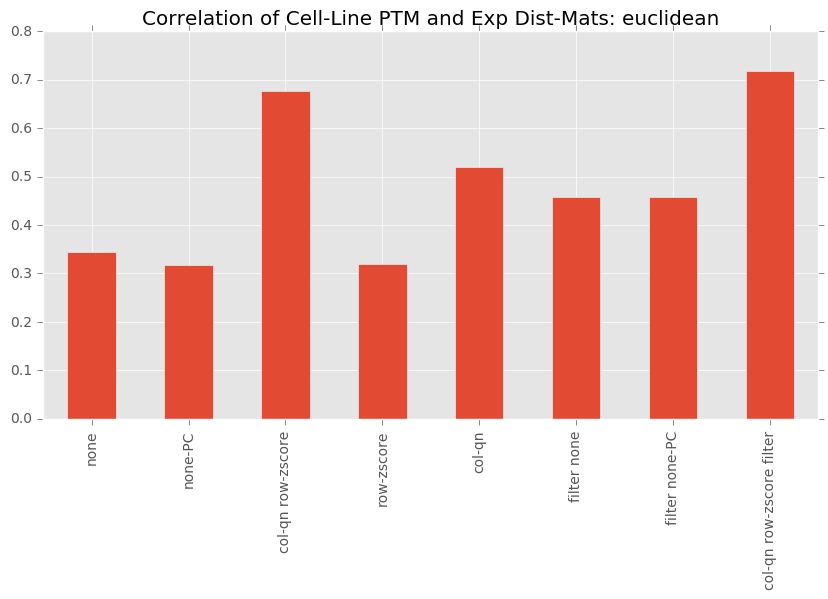

In [24]:
data_euclidean = load_mantel_data('euclidean')

In [25]:
data_euclidean

none                        0.345240
none-PC                     0.316570
col-qn row-zscore           0.676429
row-zscore                  0.318910
col-qn                      0.520014
filter none                 0.457969
filter none-PC              0.458089
col-qn row-zscore filter    0.717326
dtype: float64

### Conclusions
These results indicate that column quantile normalization as well as row zscoring improve the agreement between CCLE gene expression data and CST PTM data. Furthermore, we see a greater improvement using these normalizations than we see with either pairwise-complete distance calculation or filtering out PTMs with missing data.

We see largely the same results using different distance metrics to calculate cell-line distance. 

## Cell-line distances measured using Cosine distance

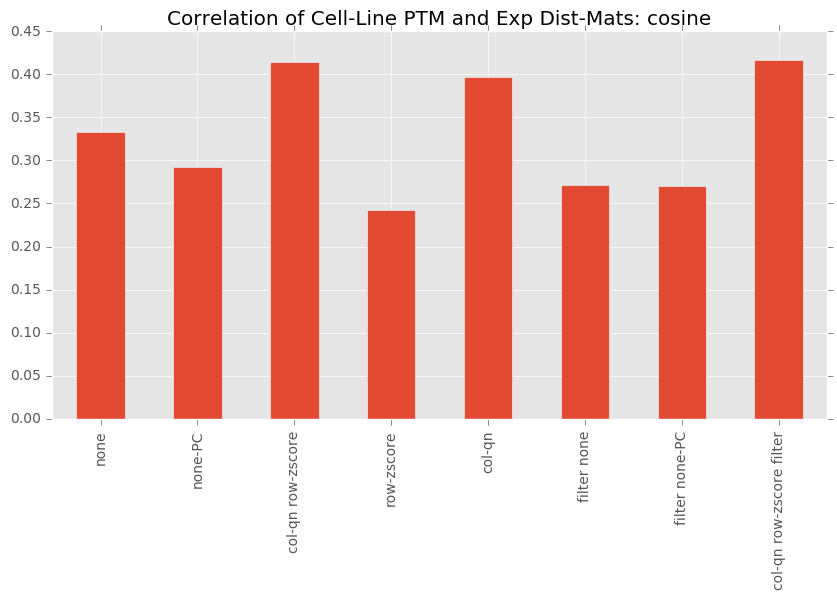

In [26]:
data_cosine = load_mantel_data('cosine')

In [27]:
data_cosine

none                        0.333540
none-PC                     0.291881
col-qn row-zscore           0.414105
row-zscore                  0.242270
col-qn                      0.397114
filter none                 0.271139
filter none-PC              0.270716
col-qn row-zscore filter    0.417084
dtype: float64

## Cell-line distances measured using Correlation distance

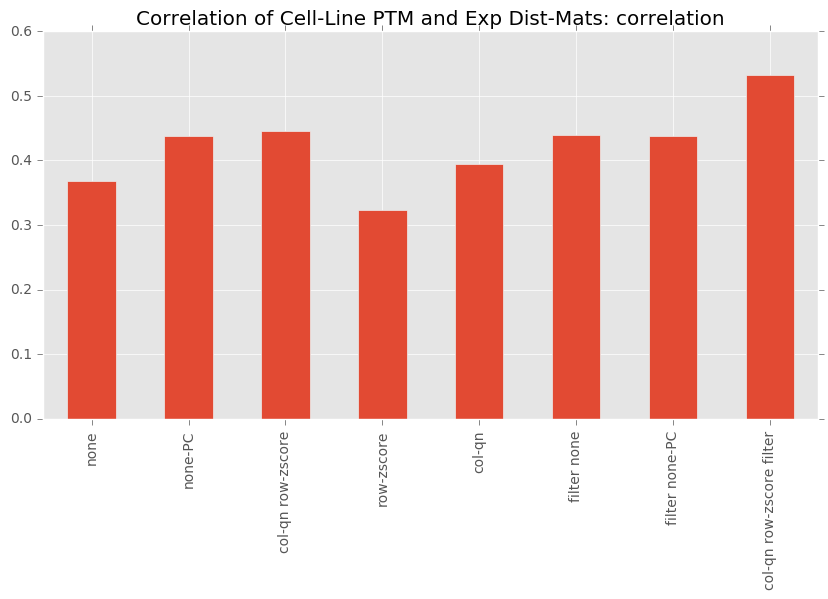

In [28]:
data_correlation = load_mantel_data('correlation')

In [29]:
data_correlation

none                        0.367826
none-PC                     0.437375
col-qn row-zscore           0.445419
row-zscore                  0.323406
col-qn                      0.394546
filter none                 0.439245
filter none-PC              0.437337
col-qn row-zscore filter    0.532029
dtype: float64